In [ ]:
import yfinance as yf
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


assets = ["AAPL", "AMZN", "GOOGL", "MSFT", "TSLA", "JPM", "JNJ", "BAC", "WMT", "PG", "MA", "NVDA", "HD", "PYPL", "DIS", "INTC", "VZ", 
          "CMCSA", "CVX", "MRK", "ASML", "KO", "PEP", "ABBV", "AZN", "NOW", "SHEL", "AMD", "META", "LLY", "UNH", "V", "XOM", "PG", "CRM", "SAP", "TBC", "HSBC"]
intervalls=  ["1mo", "3mo", "6mo", "1y", "2y"]
means= []
results = pd.DataFrame(index=assets,columns=intervalls)

#Durchführen ARIMA für jede Aktie und jedes Intervall
for element in assets:
    for time in intervalls:
            msft = yf.Ticker(element)
            df = msft.history(period=time)
            df = df.reset_index()
            df = df[['Date', 'Close']]
            df['Date'] = pd.to_datetime(df['Date'])
            train = df.iloc[:-10, 1]
            test = df.iloc[-10:, 1]
            model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
            model.fit(train)
            p, d, q = model.order
            test_forecast = model.predict(n_periods=10)
            test_forecast = pd.DataFrame(test_forecast, index=test.index, columns=['Predictions'])
            mse = mean_squared_error( test, test_forecast["Predictions"])
            results.at[element, time] = mse
            

#Normalisierung der MSE
print(results)
results = results.transpose()
for element in results:
    scaler = MinMaxScaler()
    results[element] = scaler.fit_transform(results[[element]])


#Berechnung der durschnittlichen MSE für jedes Intervall
results = results.transpose()
for element in results:
    means.append(results[element].mean())


ywerte = means
xwerte = intervalls
plt.bar(xwerte, ywerte)
plt.xlabel("Zeitintervalle")
plt.ylabel("⌀ Normalisierter RMSE über alle Aktien")
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=52.729, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=45.301, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44.150, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=45.219, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=134.673, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=47.598, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=47.060, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=54.114, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.564 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=216.855, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=218.442, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=217.965, Time=0.02 sec
 ARIMA(

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6120.989, Time=0.91 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.208 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10655.367, Time=3.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10677.522, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10677.899, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10677.957, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10676.811, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10677.226, Time=1.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10677.325, Time=1.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10656.555, Time=5.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10656.557, Time=4.95 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10676.130, Time=1.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10675.924, Time=1.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10676.492, Time=1.38 sec
 ARIMA(3,1

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=678.321, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=681.459, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.069 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1477.063, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1481.887, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1481.909, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1480.886, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1480.724, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1476.463, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1476.145, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1476.040, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1477.976, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1477.858, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[0] inter

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1661.621, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1661.641, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1657.736, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1659.636, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.438 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3671.003, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3664.842, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3666.518, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3666.536, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3662.887, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3668.409, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.847 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8498.650, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept 

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9498.186, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9484.176, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9485.383, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9444.908, Time=1.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9485.677, Time=1.05 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9446.538, Time=2.57 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9485.836, Time=2.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9484.099, Time=2.51 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9449.741, Time=1.53 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=9448.383, Time=2.78 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=9444.368, Time=0.80 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=9449.907, Time=0.87 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=9485.236, Time=0.55 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=9446.034, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=9485.384, Time=1.36 sec
 ARIMA(2,1

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8695.138, Time=1.79 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8714.797, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8706.379, Time=0.39 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8697.155, Time=1.05 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=8693.697, Time=0.56 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0] intercept
Total fit time: 13.210 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=17.466, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15.076, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11.292, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13.684, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=97.734, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17.935, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=i

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4895.538, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4895.592, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4895.666, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4895.144, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4897.373, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.649 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8579.383, Time=2.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8582.478, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8580.639, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8580.682, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8582.444, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8584.577, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.577

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=307.573, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.527 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=641.411, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=638.317, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=640.317, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=640.317, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=636.347, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=640.118, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.192 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1466.292, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1458.546, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1460.543, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1460

 ARIMA(1,2,2)(0,0,0)[0]             : AIC=14091.387, Time=0.64 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=14085.770, Time=0.49 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=14088.462, Time=0.64 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=14875.804, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=14082.397, Time=0.94 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=14694.277, Time=0.29 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=14082.669, Time=1.73 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=14087.631, Time=2.01 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=14510.220, Time=0.65 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=14076.658, Time=1.55 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=14078.275, Time=2.78 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=14067.502, Time=2.62 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=3.56 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=14064.294, Time=3.48 sec
 ARIMA(5,2,4)(0,0,0)[0]             : AIC=14072.145, Time=3.20 sec
 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=445.578, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=447.758, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=449.663, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=449.570, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=445.973, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=443.593, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=442.619, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=443.719, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=445.792, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=445.578, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=441.021, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=447.759, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=441.914, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=442.021, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=443.9

 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5913.698, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5913.703, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5911.961, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5915.697, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.570 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10545.671, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10544.216, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10539.744, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10539.829, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10542.306, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10541.674, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10541.681, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10543.673, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10537.843, Time=0.07 sec
 ARIMA(2,1,0)

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6121.512, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6125.972, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6110.840, Time=1.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6123.743, Time=1.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=6110.184, Time=1.68 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=6120.637, Time=0.48 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=6109.097, Time=3.22 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=6082.957, Time=3.07 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=6112.075, Time=1.23 sec
 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=6082.840, Time=4.31 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=6081.371, Time=4.74 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=6095.373, Time=4.00 sec
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=6083.133, Time=4.15 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=6084.077, Time=4.13 sec
 ARIMA(4,1,5)(0

 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3291.321, Time=2.12 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=3284.406, Time=3.71 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=3282.440, Time=4.69 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=3290.248, Time=3.75 sec
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=3284.032, Time=5.83 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=3285.992, Time=5.84 sec
 ARIMA(5,1,4)(0,0,0)[0]             : AIC=3282.166, Time=2.81 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=3282.211, Time=2.23 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=3287.912, Time=4.00 sec
 ARIMA(5,1,5)(0,0,0)[0]             : AIC=3281.846, Time=3.04 sec
 ARIMA(4,1,5)(0,0,0)[0]             : AIC=3284.119, Time=2.69 sec

Best model:  ARIMA(5,1,5)(0,0,0)[0]          
Total fit time: 80.349 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10.554, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] inte

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1190.905, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1192.869, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1192.863, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1189.016, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1194.049, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.499 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2372.009, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2369.388, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2371.323, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2371.322, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2368.335, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2373.320, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Tot

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=81.862, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.522 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=411.853, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=407.671, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=409.599, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=409.551, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=406.077, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=410.869, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.324 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=901.388, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=902.683, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=904.614, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=904.583,

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2448.744, Time=0.59 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2435.070, Time=1.60 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2430.073, Time=1.02 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2428.428, Time=1.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2426.516, Time=0.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2460.710, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2449.769, Time=0.19 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2428.400, Time=0.75 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2462.224, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2441.720, Time=0.21 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2430.097, Time=0.73 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2425.831, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2460.034, Time=0.34 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2449.219, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2427.738, Time=0.41 sec
 ARIMA(4,1

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8521.462, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8580.697, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8520.422, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8523.670, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8582.227, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8521.054, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8520.365, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8522.328, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8522.298, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8523.263, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8522.935, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.089 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29.104, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] inter

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4889.814, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4915.388, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4907.608, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4908.079, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4916.503, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4909.999, Time=1.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4910.151, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4907.169, Time=2.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4891.700, Time=1.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4908.874, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4895.772, Time=1.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4894.133, Time=1.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4904.044, Time=3.60 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4891.193, Time=0.87 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 17.011 second

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.903 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1373.853, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1368.776, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1370.731, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1370.724, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1367.857, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.873 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3306.922, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3299.104, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3301.061, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3301.061, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32

 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.354 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8019.678, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8016.999, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8016.927, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8017.014, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8015.142, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8017.312, Time=0.58 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.452 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14607.496, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14605.339, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14603.726, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1642.398, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.706 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3316.523, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3313.528, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3314.698, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3314.734, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3311.795, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3316.374, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.269 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8015.162, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8050.569, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8044.452, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8045.647, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]           

 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=6560.688, Time=0.33 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=6543.148, Time=0.80 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=6562.656, Time=0.34 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=6540.654, Time=0.29 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=6559.624, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=6548.547, Time=0.26 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(1,1,5)(0,0,0)[0]             : AIC=6542.000, Time=0.45 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=6560.838, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=6561.581, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=6551.469, Time=1.09 sec
 ARIMA(2,1,5)(0,0,0)[0]             : AIC=inf, Time=2.33 sec

Best model:  ARIMA(1,1,4)(0,0,0)[0]          
Total fit time: 17.304 seconds
Performing stepwis

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=909.054, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=906.328, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=907.371, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=907.525, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=904.453, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=907.370, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.369 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1915.580, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1909.155, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1911.150, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1911.150, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1907.432, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1913.150, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.782 seconds
Performing stepwi

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=34.573, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=34.939, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=33.077, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=36.222, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.810 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=190.486, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=190.781, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=190.531, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=189.300, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.335 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-101.434, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.808 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-396.984, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-394.999, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-395.000, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-398.984, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-393.000, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.935 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1043.536, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1039.747, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1046.042, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1045.227, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]            

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2847.098, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2844.906, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2843.213, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2843.410, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2843.012, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2844.199, Time=0.61 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.198 seconds


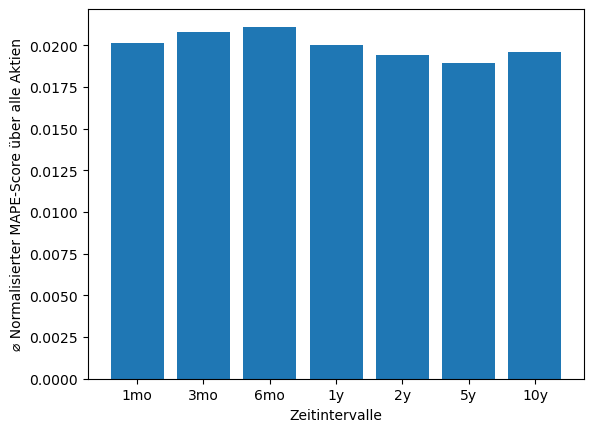

In [4]:
import yfinance as yf
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error


assets = ["AAPL", "AMZN", "GOOGL", "MSFT", "TSLA", "JPM", "JNJ", "BAC", "WMT", "PG", "MA", "NVDA", "HD", "PYPL", "DIS", "INTC", "VZ", 
          "CMCSA", "CVX", "MRK", "ASML", "KO", "PEP", "ABBV", "AZN", "NOW", "SHEL", "AMD", "META", "LLY", "UNH", "V", "XOM", "PG", "CRM", "SAP", "TBC", "HSBC"]
intervalls=  ["1mo", "3mo", "6mo", "1y", "2y", "5y", "10y"]
means= []
results = pd.DataFrame(index=assets,columns=intervalls)

#Durchführen ARIMA für jede Aktie und jedes Intervall
for element in assets:
    for time in intervalls:
            msft = yf.Ticker(element)
            df = msft.history(period=time)
            df = df.reset_index()
            df = df[['Date', 'Close']]
            df['Date'] = pd.to_datetime(df['Date'])
            train = df.iloc[:-10, 1]
            test = df.iloc[-10:, 1]
            model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
            model.fit(train)
            p, d, q = model.order
            test_forecast = model.predict(n_periods=10)
            test_forecast = pd.DataFrame(test_forecast, index=test.index, columns=['Predictions'])
            mape_result = mean_absolute_percentage_error( test, test_forecast["Predictions"])
            results.at[element, time] = mape_result
            




#Berechnung des durchschnittlichen MAPE-Score für jedes Intervall
for element in results:
    means.append(results[element].mean())



ywerte = means
xwerte = intervalls
plt.bar(xwerte, ywerte)
plt.xlabel("Zeitintervalle")
plt.ylabel("⌀ MAPE-Score über alle Aktien")
plt.show()